In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
import time

In [2]:
%matplotlib inline
plt.rcParams['font.family'] = 'NanumGothic'

In [3]:
sns.set(style='ticks')
plt.rcParams['figure.figsize'] = [15, 15]

# 데이터 로드

In [7]:
dfmember = pd.read_csv('./table/member.csv')
dfdata = pd.read_csv('./table/190401-200531_prj_data.csv')

C:\Users\wcid\anaconda3\envs\ai-env\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7,24,26,27,35,42,46,51,52,53,67,69,70) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\wcid\anaconda3\envs\ai-env\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (12,13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
startdate = datetime.date(2019,4,1)
enddate = datetime.date(2020,6,1)
dfdata['work_user'] = dfdata['work_user'].apply(lambda x:round(x))
dfdata['check_user'] = dfdata['check_user'].apply(lambda x:round(x) if not math.isnan(x) else 0)
dfmember['reg_date'] = pd.to_datetime(dfmember['reg_date']).dt.date
memlist = dfmember[(dfmember['reg_date']>=startdate) & (dfmember['reg_date']<enddate)]
memlist

member_id                                               uuid  \
3            2001  b'H\x8a\x14+\xe7tC\r\xb1\xe4K\xb7\xca\x1b\xc2\...   
11219       21521    b'M\r\x1ai\xbc\xe7y\x8f\xb0\xfeY\xba\xca&z\xb2'   
11220       21522  b'N\xf08#\x10\xb4\xe6\xc2\x97\x9c\xc4A\x8f\x0e...   
11221       21523                    b'I!g\xb3]\xc118\xbcQ\x9dc|q0R'   
11222       21524     b'HU<l_\xf6\x05\xaa\xaa\xf0W>\x9d\xe3\x9c\xa1'   
...           ...                                                ...   
150023     160897        b'ERL\x13\x90fp\xfe\x80U)\xd7\xf7\xdb#\x1f'   
150024     160898  b'F)\x14\xa5T\x17\x9e\xb8\x89m\xc4\xe1\xc74h\x82'   
150025     160899          b'L\x16GG\t\x16o\x00\xb3H\xdaB;X\xd1\xcb'   
150026     160900      b'BAD#}\xbf\xa3\xa9\x9e2\\\x01\n\xf7\xa5\x1c'   
150027     160901  b'G\x1a\xe2\xf2q\xe1\xb7\r\x8a\xdb^\xc9\xdf\x8...   

       member_type_cd                 login_id member_nm   nickname  \
3              SYSTEM      unlink-online@cw.io    온라인미연결     온라인미연결   
11219          WORKER       soojung72@daum.net       정수정       즐거운맘   
11220          WORKER     tjdals4066@naver.com       박성민        돈돈돈   
11221          WORKER       wlgh7782@gmail.com       양지호         양카   
11222          WORKER  ninjashade314@gmail.com       장현영     지나가는사람   
...               ...                      ...       ...        ...   
150023         WORKER      ekgus9501@gmail.com       석다현        따따리   
150024         WORKER    entia7124@janmail.net       최진숙  entia7124   
150025         WORKER         yubinn@kakao.com       김유빈      Mavel   
150026         WORKER          yy6661@nate.com       김제원    짱구는못말려1   
150027         WORKER     sossosyoon@naver.com       최서윤     서윤5986   

       mem_class_cd bak_class_cd reg_platform reg_div_cd  ...  \
3           STARTER          NaN           PC       SITE  ...   
11219   SILVER_PLUS          NaN           PC       SITE  ...   
11220   BRONZE_PLUS          NaN           PC       SITE  ...   
11221       STARTER          NaN           PC       SITE  ...   
11222   SILVER_PLUS          NaN           PC       SITE  ...   
...             ...          ...          ...        ...  ...   
150023      STARTER          NaN          ios       SITE  ...   
150024      STARTER          NaN      android       SITE  ...   
150025      STARTER          NaN           PC       SITE  ...   
150026      STARTER          NaN      android       SITE  ...   
150027      STARTER          NaN          ios       SITE  ...   

       member_register_online_cd    dormant_init_date dormant_release_at  \
3                             CW                  NaN                NaN   
11219                     ONLINE                  NaN                NaN   
11220                     ONLINE                  NaN                NaN   
11221                     ONLINE  2020-04-02 01:02:02                NaN   
11222                     ONLINE                  NaN                NaN   
...                          ...                  ...                ...   
150023                    ONLINE                  NaN                NaN   
150024                    ONLINE                  NaN                NaN   
150025                    ONLINE                  NaN                NaN   
150026                    ONLINE                  NaN                NaN   
150027                    ONLINE                  NaN                NaN   

       link_member_id           updated_at withdrawal_request_cd  \
3                 NaN  2019-10-29 18:03:12                  self   
11219             NaN  2020-02-07 17:23:57                  self   
11220             NaN  2019-10-29 18:03:12                  self   
11221             NaN  2020-04-02 01:02:02                  self   
11222             NaN  2020-01-21 14:05:52                  self   
...               ...                  ...                   ...   
150023            NaN  2020-05-31 23:19:58                  self   
150024            NaN  2020-06-04 18:31:51          

In [6]:
wdlist = dfdata[dfdata['work_user'].isin(memlist['member_id'])]
cdlist = dfdata[dfdata['check_user'].isin(memlist['member_id'])]

wdlist['date'] = pd.to_datetime(wdlist['work_edate']).dt.date
wdlist = wdlist[wdlist['date']<enddate]
cdlist['date'] = pd.to_datetime(cdlist['check_edate']).dt.date
cdlist = cdlist[cdlist['date']<enddate]

C:\Users\wcid\anaconda3\envs\ai-env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\wcid\anaconda3\envs\ai-env\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
mt = memlist[['member_id', 'reg_date']].set_index('member_id')
mt['cumul_point'] = 0

In [8]:
wt = wdlist[['work_user', 'date', 'work_point']]
wt.columns = ['user', 'date', 'point']
wt['type'] = 'work'
ct = cdlist[['check_user', 'date', 'check_point']]
ct.columns = ['user', 'date', 'point']
ct['type'] = 'check'
target = pd.concat([wt, ct]).sort_values('date').reset_index(drop=True)
target

C:\Users\wcid\anaconda3\envs\ai-env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\wcid\anaconda3\envs\ai-env\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


user        date  point   type
0         21539  2019-04-01  300.0   work
1         21537  2019-04-01  300.0   work
2         21537  2019-04-01  300.0   work
3         21537  2019-04-01  300.0   work
4         21537  2019-04-01  300.0   work
...         ...         ...    ...    ...
7681080  128586  2020-05-31    0.0  check
7681081  128586  2020-05-31    0.0  check
7681082  128586  2020-05-31    0.0  check
7681083  128586  2020-05-31    0.0  check
7681084  128586  2020-05-31    0.0  check

[7681085 rows x 4 columns]

In [9]:
def helper(row):
    user = row['user']
    date = row['date']
    point = row['point']
    
    if math.isnan(point):
        point = 0
    
    cumul_point = mt.at[user, 'cumul_point'] + point
    mt.at[user, 'cumul_point'] = cumul_point
    
    reg = mt.at[user, 'reg_date']
    
    return  cumul_point, (date-reg).days

tmp = target.apply(helper, axis=1)

In [13]:
df = pd.DataFrame(tmp.tolist())
df.columns = ['cumul_point', 'from_reg']
df = pd.concat([target, df], axis=1)

In [15]:
df.to_csv('table/new_inflow_total.csv')

---
---

# 최근 3개월 내 가입자 요약
##### 3개월 간 신규 가입자 수 : 27201
##### 그 중 한 건도 작업 및 검수를 진행하지 않은 인원 : 20631
##### 한 건이라도 작업 및 검수를 진행한 인원 : 6570
### 누적 포인트
##### 5000 미만 (STARTER) : 5968
##### 10000 미만 (BRONZE) : 235
##### 50000 미만 (BRONZE_PLUS) : 290
##### 100000 미만 (SILVER) : 43
##### 500000 미만 (SILVER_PLUS) : 21
##### 1000000 미만 (GOLD) : 2
##### 1000000 이상 (GOLD_PLUS) : 11

In [81]:
grp = df.groupby('user').max()

In [84]:
grp[(grp['cumul_point']>=500000) & (grp['cumul_point']<1000000)]

date  type    point  cumul_point  from_reg
user                                                    
141159  2020-05-07  work  66114.0     711296.0        38
141160  2020-04-20  work  44190.0     760440.0        21

# 날짜 별 15일 이내 가입자 수, 작업 참여자 수

In [4]:
df = pd.read_csv('table/new_inflow_total.csv')
df['date'] = pd.to_datetime(df['date']).dt.date
churnworker = pd.read_csv('table/churn_worker_info.csv')
churnchecker = pd.read_csv('table/churn_checker_info.csv')

churnworker['churn_sdate'] = pd.to_datetime(churnworker['churn_sdate']).dt.date
churnworker['reg_date'] = pd.to_datetime(churnworker['reg_date']).dt.date
churnworker['from_reg'] = (churnworker['churn_sdate']-churnworker['reg_date']).apply(lambda x:x.days)

In [75]:
analy = pd.DataFrame()

In [89]:
# 15일 이내 가입자 수
days = pd.date_range('2019-04-01', '2020-05-31', freq='D')
ddf = pd.DataFrame({'date':days})
def date15Helper(date):
    tmp = memlist[memlist['reg_date']<=date]
    tmp = tmp[tmp['reg_date']>(date-datetime.timedelta(days=15))]
    return len(tmp)

ddf['inflow'] = ddf['date'].apply(date15Helper)
t = ddf.copy()
t.columns = ['date', 'cnt']
t['type'] = 'reg_in_15'
analy = pd.concat([analy, t])

In [76]:
# 당일 가입자 수
days = pd.date_range('2019-04-01', '2020-05-31', freq='D')
ddf = pd.DataFrame({'date':days})
def dateHelper(date):
    tmp = memlist[memlist['reg_date']==date]
    return len(tmp)

ddf['inflow'] = ddf['date'].apply(dateHelper)
t = ddf.copy()
t.columns = ['date', 'cnt']
t['type'] = 'reg'
analy = pd.concat([analy, t])

In [77]:
# 신규 가입자 중 당일 작업자 수
ndf = df[df['from_reg']<15]
ndf = ndf.groupby(['date', 'user']).first().reset_index()[['date', 'user']].groupby('date').count().reset_index()
t = ndf.copy()
t.columns = ['date', 'cnt']
t['type'] = 'job'
analy = pd.concat([analy, t])

In [78]:
# 신규 가입자 중 15일 이내 작업자 수
pt = df[df['from_reg']<15]
def periodHelper(date):
    tmp = pt[pt['date']<=date]
    tmp = tmp[tmp['date']>(date-datetime.timedelta(days=15))]
    return tmp['user'].nunique()

days = pd.date_range('2019-04-01', '2020-05-31', freq='D')
pdf = pd.DataFrame({'date':days})
pdf['cnt'] = pdf['date'].apply(periodHelper)
t = pdf.copy()
t['type'] = 'job_in_15'
analy = pd.concat([analy, t])

In [79]:
# 신규 가입자 중 이탈 작업자 수
cwdf = churnworker[churnworker['from_reg']<15]
cwdf = pd.DataFrame(churnworker.groupby('churn_sdate').nunique()['member_id'])
cwdf = cwdf.reset_index()
cwdf.columns = ['date', 'cnt']
cwdf['type'] = 'churn_worker'
t = cwdf.copy()
analy = pd.concat([analy, t])

# 신규 가입자의 작업 참여, 이탈 비교
* job: 15일 이내 가입자 중 해당 날짜 작업 참여자 수
* churn_worker: 15일 이내 가입자 중 해당 날짜 이탈 작업자 수

### 정리
* 신규 가입자 중 작업 참여자의 변화에 따라 이탈 작업자도 비슷한 양상으로 변화함
* 신규 가입자 상당수가 작업 몇 개를 진행하다가 흥미를 잃고 이탈하는 것으로 판단됨
* 신규 가입자가 흥미를 잃지 않도록 작업 인터페이스의 편의성을 높이거나, 참여 가능 프로젝트 수를 늘리거나, 컨텐츠를 늘리는 등의 변화가 필요할 것으로 보임

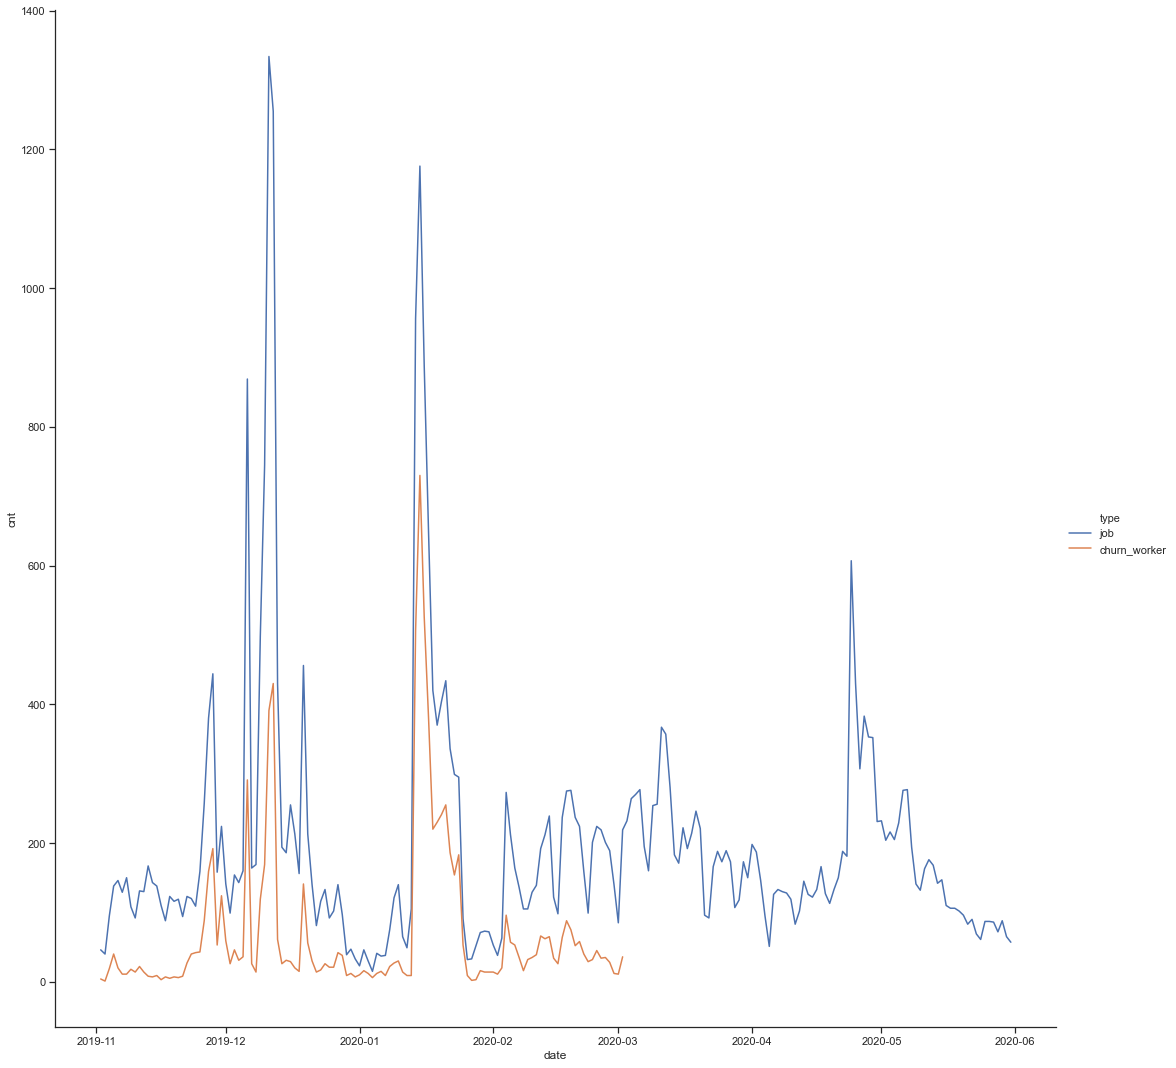

In [98]:
target = analy[analy['type'].isin(['job', 'churn_worker'])]
target = target[target['date']>datetime.date(2019,11,1)]
sns.relplot(x='date', y='cnt', hue='type', kind='line', markers=True, data=target, height=15)

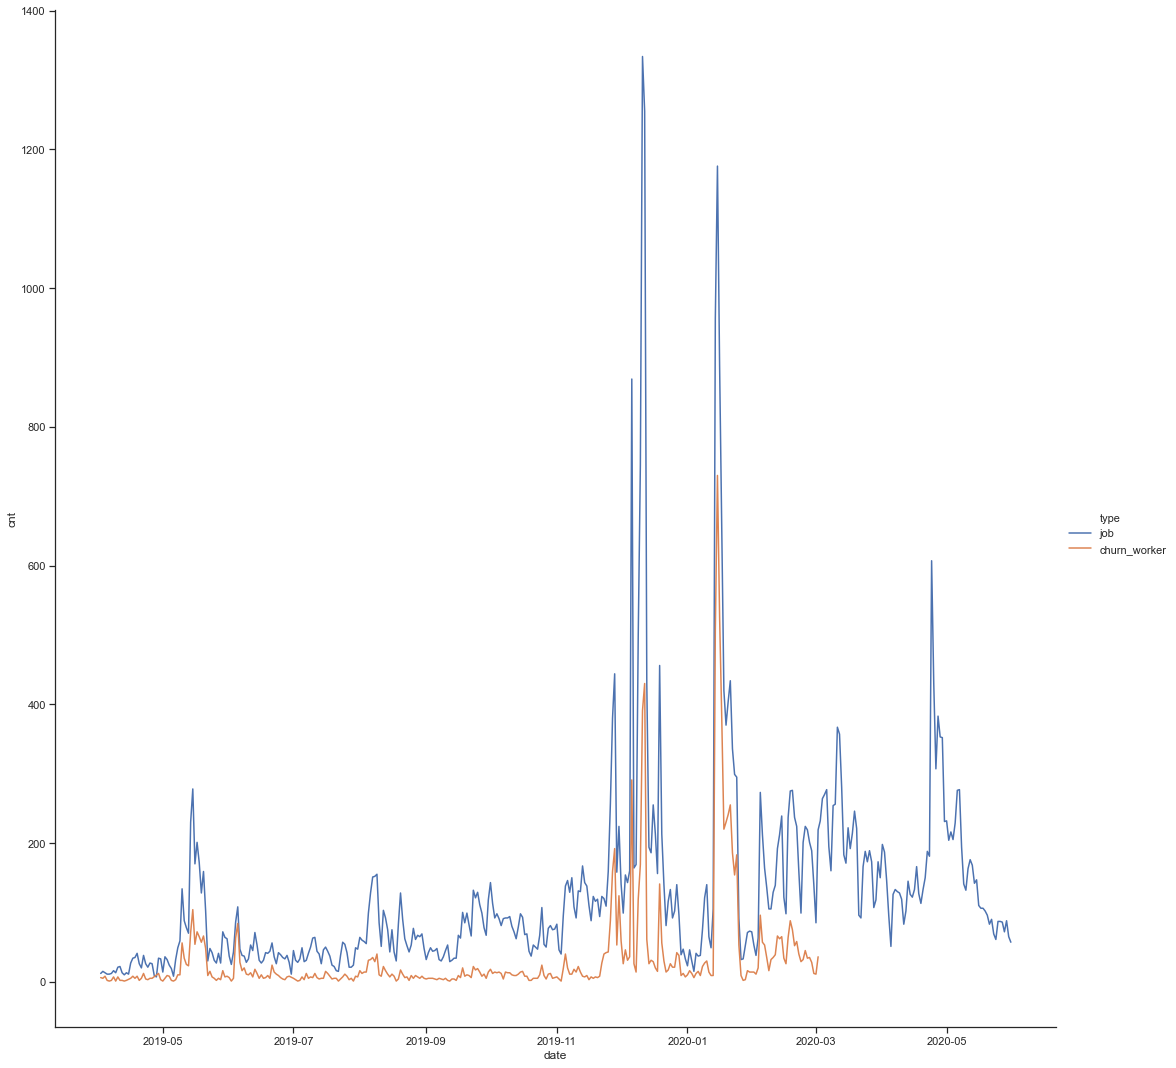

In [92]:
target = analy[analy['type'].isin(['job', 'churn_worker'])]
target = target[target['date']>datetime.date(2019,4,1)]
sns.relplot(x='date', y='cnt', hue='type', kind='line', markers=True, data=target, height=15)

# 15일 이내 가입자, 작업 참여자 비교
* reg_in_15: 15일 이내 가입자 수
* job_in_15: 15일 이내 가입자 중 그 기간 내 한 건이라도 작업에 참여한 인원 수

### 정리
- 신규 작업 참여자 수가 신규 가입자 수의 증가폭을 따라잡지 못함
- 충분한 프로젝트를 갖추지 않은 상태에서의 가입자 수 증가는 무의미함
- 다만 신규 작업 참여자의 증가 없이 오픈 프로젝트를 늘리는 것도 바람직하지 않아 보임
    - 프로젝트가 원활히 진행되지 않을 것
    
- 신규 가입자 수에 따른 적정 프로젝트 수를 나타내는 식을 찾을 수 있을 듯

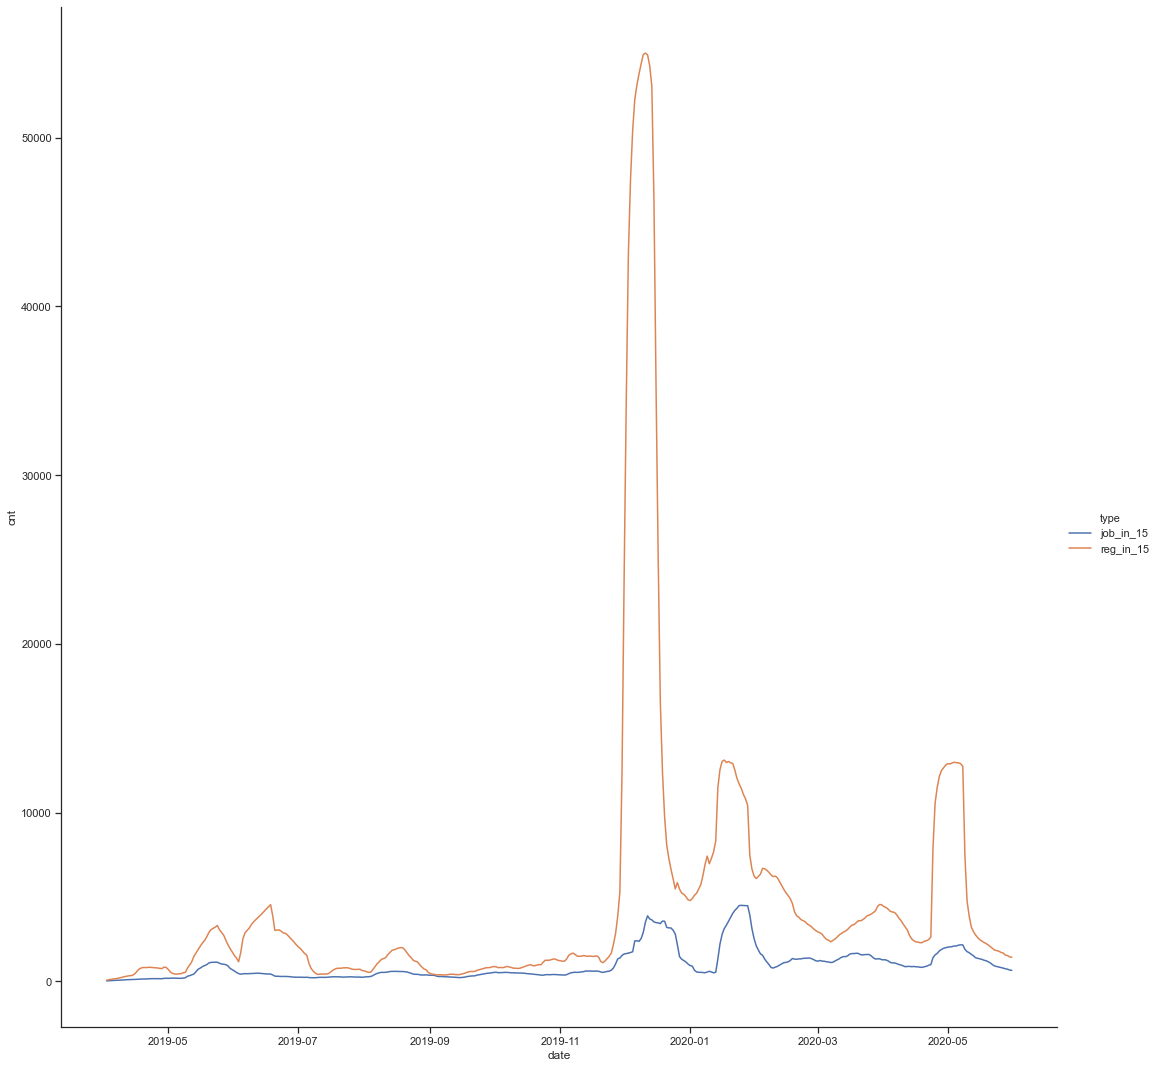

In [97]:
target = analy[analy['type'].isin(['reg_in_15','job_in_15'])]
target = target[target['date']>datetime.date(2019,4,1)]
sns.relplot(x='date', y='cnt', hue='type', kind='line', markers=True, data=target, height=15)